<h1>Groupe 1: ASAFEM</h1>
<h3>Prédiction du cancer de col de l'utérus avec le logistic Regression</h3>

In [678]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from yellowbrick.classifier import classification_report as yellowbrick_classifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline

In [881]:
data = pd.read_csv('risk_factors_cervical_cancer.csv',sep=',')

In [882]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [883]:
#On va remplacer les ? par des Nan
data = pd.read_csv('risk_factors_cervical_cancer.csv',sep=',',na_values='?')

In [884]:
data.shape

(858, 36)

On a un dataset de **858 lignes** et **36 columns**

In [885]:
display(list(data.columns))

['Age',
 'Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'STDs: Time since first diagnosis',
 'STDs: Time since last diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']

**Type des données**

In [886]:
data.dtypes

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

In [887]:
data.dtypes.value_counts()

float64    26
int64      10
dtype: int64

In [888]:
print(len(data.select_dtypes('int64').columns));
display(list(data.select_dtypes('int64').columns));
display(list(data.select_dtypes('int64').nunique()))

10


['Age',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']

[44, 4, 2, 2, 2, 2, 2, 2, 2, 2]

In [889]:
data.Hinselmann.unique()

array([0, 1])

On a **10 colonnes avec des valeurs entieres qui sont 0 ou 1** et 26 colonnes avec des valeurs décimales.

In [890]:
data.select_dtypes('float64').nunique()

Number of sexual partners             12
First sexual intercourse              21
Num of pregnancies                    11
Smokes                                 2
Smokes (years)                        30
Smokes (packs/year)                   62
Hormonal Contraceptives                2
Hormonal Contraceptives (years)       40
IUD                                    2
IUD (years)                           26
STDs                                   2
STDs (number)                          5
STDs:condylomatosis                    2
STDs:cervical condylomatosis           1
STDs:vaginal condylomatosis            2
STDs:vulvo-perineal condylomatosis     2
STDs:syphilis                          2
STDs:pelvic inflammatory disease       2
STDs:genital herpes                    2
STDs:molluscum contagiosum             2
STDs:AIDS                              1
STDs:HIV                               2
STDs:Hepatitis B                       2
STDs:HPV                               2
STDs: Time since

In [891]:
data.select_dtypes('float64').nunique().value_counts()

2     14
1      2
18     2
12     1
21     1
11     1
30     1
62     1
40     1
26     1
5      1
dtype: int64

In [892]:
data['STDs:AIDS'].unique()

array([ 0., nan])

In [893]:
data['STDs:cervical condylomatosis'].unique()

array([ 0., nan])

Il y'a deux colonnes avec une valeur qui ne varie pas qui est égale à 0. On pourra les supprimer parce qu'elles n'apportent aucune information.

In [894]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

In [895]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,832.000000,851.000000,802.000000,845.000000,845.000000,845.000000,750.000000,750.000000,741.000000,...,71.000000,71.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.667760,2.803355,1.447414,0.352876,4.089017,2.226610,0.479929,3.764254,0.315593,...,5.895024,5.755271,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,...,8.000000,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [896]:
data.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [897]:
#cherchons les colonnes dont les valeurs null sont supérieures à 50%
#les colonnes qui ont une valeur qui ne varie pas
colToDel = []
for col in data.columns:
    avg = (data[col].isnull().sum()/858)*100
    if(avg > 50):
        colToDel.append(col)      
#data.isnull().sum()
colToDel

['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']

Pour les Nan:
- On va supprimer les colonnes dont le nombre de Nan est supérieure à 50%
- Pour les autres on va les remplacer par la mediane de leur colonne. En effet la médiane est insensible aux valeurs aberrantes qui pourraient influer négativement sur le modèle.On peut utiliser le boxplot pour confimer la dissymétrie des données.

In [898]:
#on supprime les colonnes qui apportent la meme information
data.drop(columns=['Smokes (packs/year)','Hormonal Contraceptives','IUD','STDs','STDs:Hepatitis B'],axis=1,inplace=True)

In [899]:
data.drop(columns=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis','STDs:AIDS','STDs:cervical condylomatosis'],axis=1,inplace=True)

In [901]:
#on va remplacer les valeurs manquantes par la median
data = data.fillna(data.median())

In [902]:
data.shape

(858, 27)

**Visualisation**

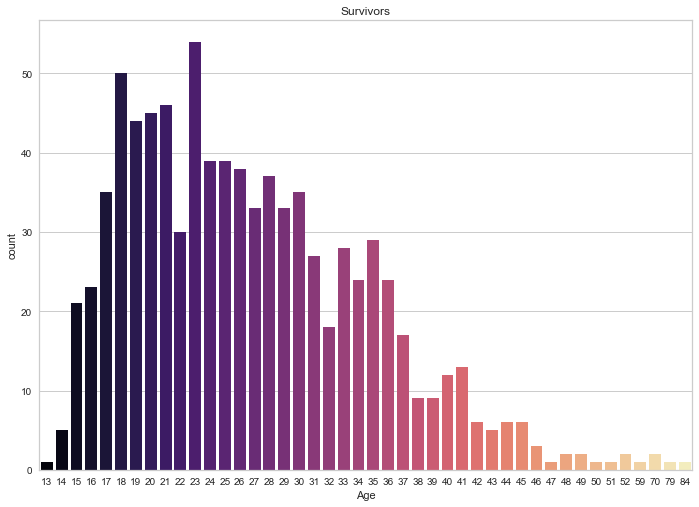

In [903]:
fig, ax = plt.subplots(figsize=(11.7,8.27))
sns.countplot(x = 'Age', data = data, palette = 'magma')
plt.title('Survivors')
plt.show()

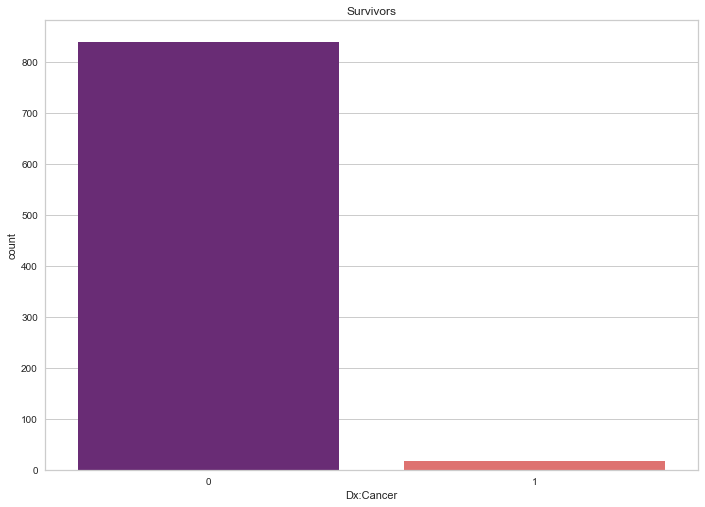

In [904]:
fig, ax = plt.subplots(figsize=(11.7,8.27))
sns.countplot(x = 'Dx:Cancer', data = data, palette = 'magma')
plt.title('Survivors')
plt.show()

<h4>Dans notre dataset on a 18 cas positives et toutes les autres sont négatives</h4>

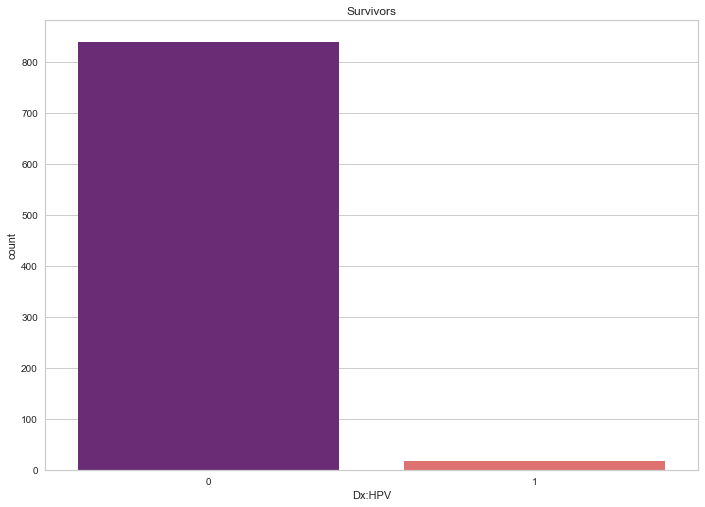

In [905]:
fig, ax = plt.subplots(figsize=(11.7,8.27))
sns.countplot(x = 'Dx:HPV', data = data, palette = 'magma')
plt.title('Survivors')
plt.show()

Corrélation entre les variables

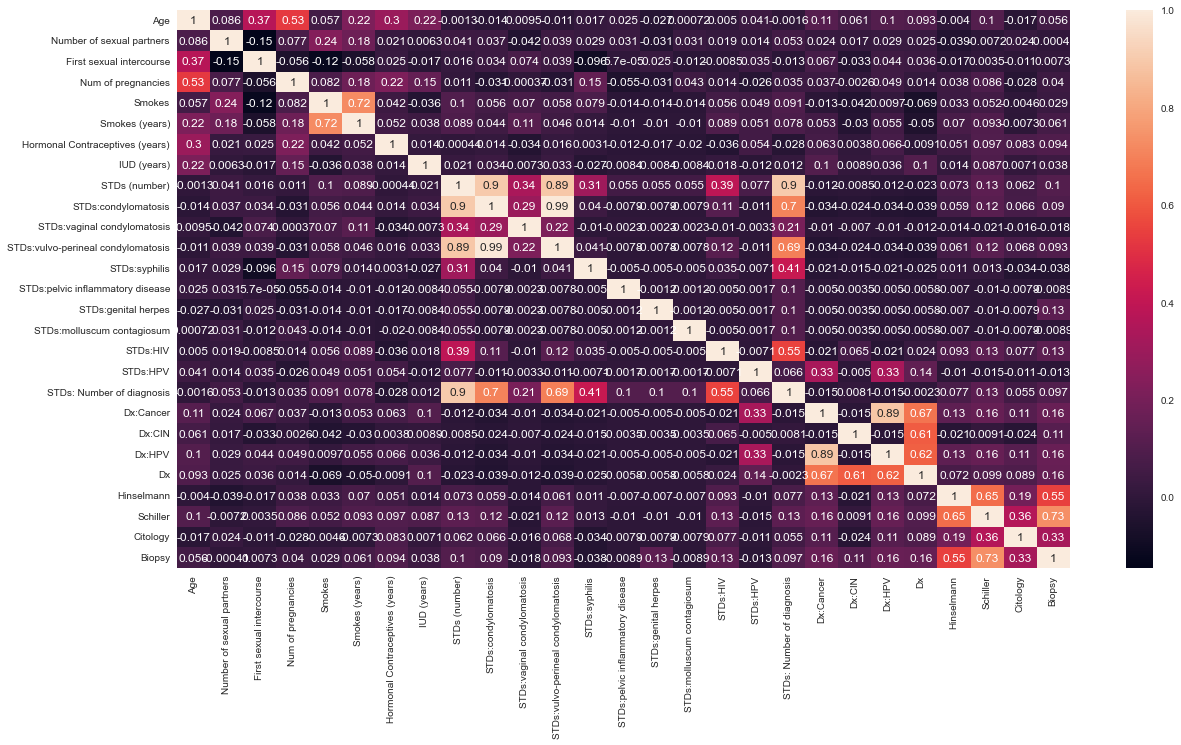

In [906]:
fig, ax = plt.subplots(figsize=(20,10.27))
sns.heatmap(data.corr(),annot=True);

Essayons de voir la corrélation des colonnes avec la colonne cancer

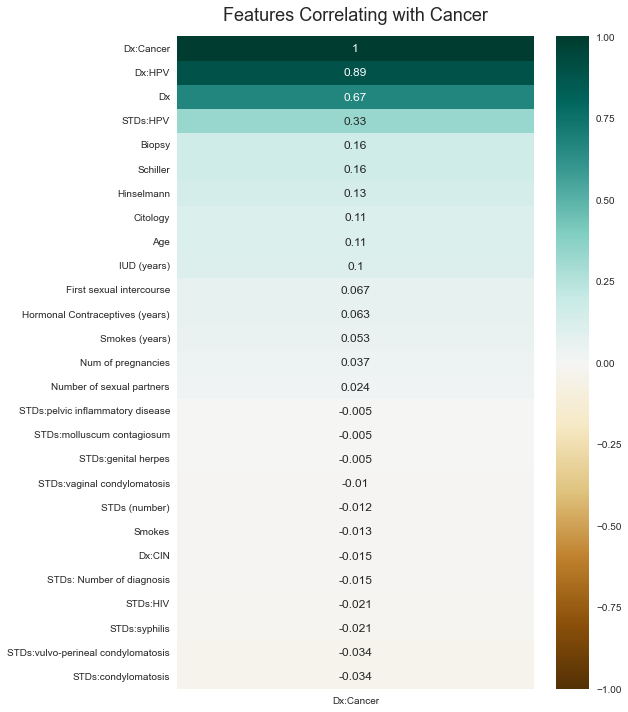

In [907]:
plt.figure(figsize=(8, 12))
heatmap_c = sns.heatmap(data.corr()[['Dx:Cancer']].sort_values(by='Dx:Cancer', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_c.set_title('Features Correlating with Cancer', fontdict={'fontsize':18}, pad=16);

In [908]:
correlated_with_cancer = data.corr()[['Dx:Cancer']].sort_values(by='Dx:Cancer', ascending=False)

In [909]:
correlated_with_cancer = correlated_with_cancer.loc[correlated_with_cancer['Dx:Cancer']>=0.1]

In [910]:
correlated_with_cancer

,Dx:Cancer
Dx:Cancer,1.000000
Dx:HPV,0.886508
Dx,0.665647
STDs:HPV,0.330203
Biopsy,0.160905
Schiller,0.157812
Hinselmann,0.134264
Citology,0.113446
Age,0.110340
IUD (years),0.103148


Il y'a **11 colonnes qui influent vraiment sur le fait d'avoir le cancer avec un minimium de score de 10%**

Il certaines colonnes qui sont corrélées

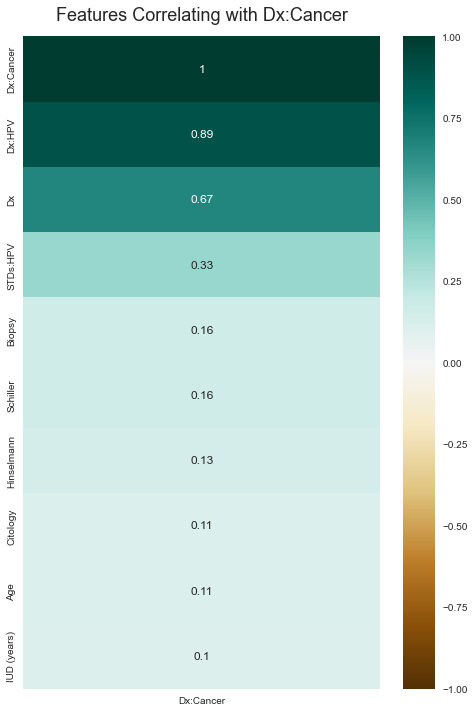

In [911]:
plt.figure(figsize=(8, 12))
heatmap_10 = sns.heatmap(correlated_with_cancer.sort_values(by='Dx:Cancer', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_10.set_title('Features Correlating with Dx:Cancer', fontdict={'fontsize':18}, pad=16);

Le CCU est une maladie qui est à 95% causée par l'infection au HPV. DAns notre dataset on voit que les deux colonnes sont corrélées à 89%. Les maladies sexuellement transmissibles et le cancer sont également assez corrélés meme si c'est moins de 30%.
Les rests medicaux comme la biopsy, le Shiller, le Hinselman, la citology sont aussi corrélées à plus de 10% avec la colonne Cancer.
l'age, le nombre d'années fumées et les appareils intrautérins sont également corrélés à la colonnes cancers.

### Implementation du model: logistic Regression

La régression logistique est une technique de classification fondamentale. Elle appartient au groupe des classificateurs linéaires et est quelque peu similaire à la régression polynomiale et linéaire. La régression logistique est rapide et relativement simple, et l'interprétation des résultats est aisée. Bien qu'il s'agisse essentiellement d'une méthode de classification binaire, elle peut également être appliquée à des problèmes multi-classes.
Pour notre problème il s'agira de prédire si une personne a le CCU ou pas, donc un output catégorial. C'est une classification binaire d'où l'utilisation du logisticRegression.


In [948]:
x = data.loc[:,data.columns != 'Dx:Cancer']
y = data['Dx:Cancer']

In [949]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=1)
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',solver='liblinear', max_iter=10000))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=x_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10))
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

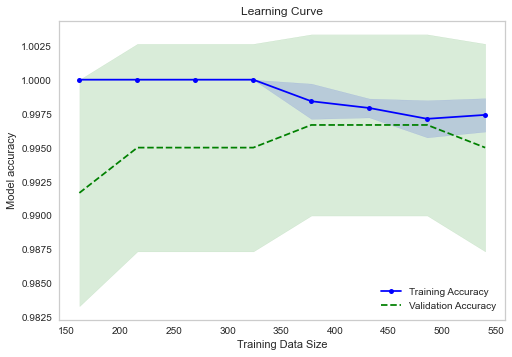

In [950]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

D'après la courbe d'apprentissage, il n'ya pas de sous-apprentissage ni de sur-apprentissage.Ce qui montre que notre modèle généralise bien.

In [951]:
pipeline.fit(x_train,y_train)
p_pred = pipeline.predict_proba(x_test)
y_pred = pipeline.predict(x_test)
score_ = pipeline.score(x_test, y_test)
conf_m = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

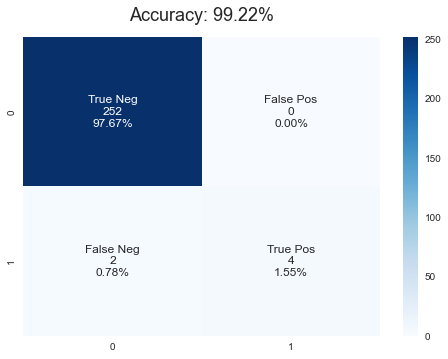

In [952]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_m.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_m.flatten()/np.sum(conf_m)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
cm = sns.heatmap(conf_m, annot=labels, fmt='', cmap='Blues')
cm.set_title(f'Accuracy: {score_*100:.2f}%', fontdict={'fontsize':18}, pad=16);

**Precision:**  is defined as the ratio of true positives to the sum of true and false positives.

**Recall:**  is defined as the ratio of true positives to the sum of true positives and false negatives.

**F1 Score:** is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.

**Support:** is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


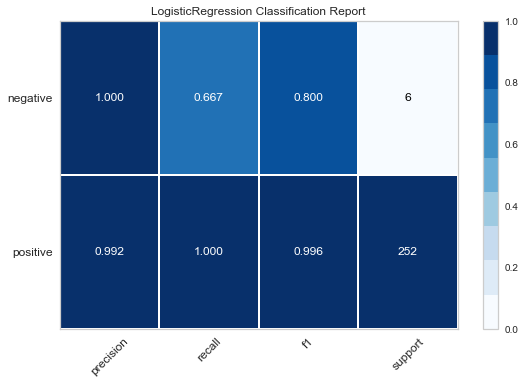

In [953]:
visualizer = yellowbrick_classifier(
    pipeline, x_train, y_train, x_test, y_test, classes=['positive','negative'], support=True,cmap='blues'
)

#### Validation croisée

In [954]:
scores = cross_val_score(pipeline, X, y, cv = 5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.97674419 0.99418605 1.         1.         0.98830409]
Average CV Score:  0.9918468652250783
Number of CV Scores used in Average:  5


### Features important
Il s'agit de techniques qui attribuent un score aux caractéristiques d'entrée en fonction de leur utilité pour prédire une variable cible.

Les scores d'importance des caractéristiques jouent un rôle important dans un projet de modélisation prédictive, notamment en fournissant un **aperçu des données**(*mettre en évidence les caractéristiques les plus pertinentes pour la cible et, à l'inverse, les caractéristiques les moins pertinentes. Ces résultats peuvent être interprétés par un expert du domaine et servir de base à la collecte de données supplémentaires ou différentes*), un **aperçu du modèle**(*'inspection du score d'importance donne un aperçu de ce modèle spécifique et des caractéristiques qui sont les plus importantes et les moins importantes pour le modèle lors d'une prédiction.*) et une **base pour la réduction de la dimensionnalité** et la **sélection des caractéristiques** qui peuvent améliorer l'efficacité d'un modèle prédictif sur le problème.

**L'importance des caractéristiques peut être utilisée pour améliorer un modèle prédictif. Cela peut être réalisé en utilisant les scores d'importance pour sélectionner les caractéristiques à supprimer (scores les plus bas) ou les caractéristiques à conserver (scores les plus élevés). Il s'agit d'un type de sélection de caractéristiques qui peut simplifier le problème à modéliser, accélérer le processus de modélisation (la suppression de caractéristiques est appelée réduction de la dimensionnalité) et, dans certains cas, améliorer les performances du modèle.**

Feature: 0, Score: -0.19738
Feature: 1, Score: 0.10735
Feature: 2, Score: 0.08356
Feature: 3, Score: 0.08627
Feature: 4, Score: -0.09971
Feature: 5, Score: -0.01730
Feature: 6, Score: 0.23979
Feature: 7, Score: 0.24473
Feature: 8, Score: -0.02252
Feature: 9, Score: -0.04624
Feature: 10, Score: 0.01596
Feature: 11, Score: -0.04416
Feature: 12, Score: -0.00626
Feature: 13, Score: 0.00000
Feature: 14, Score: -0.02071
Feature: 15, Score: -0.00187
Feature: 16, Score: -0.01673
Feature: 17, Score: 0.20197
Feature: 18, Score: 0.03194
Feature: 19, Score: -0.47717
Feature: 20, Score: 0.35978
Feature: 21, Score: 0.85983
Feature: 22, Score: -0.16544
Feature: 23, Score: 0.22647
Feature: 24, Score: -0.03337
Feature: 25, Score: 0.16664


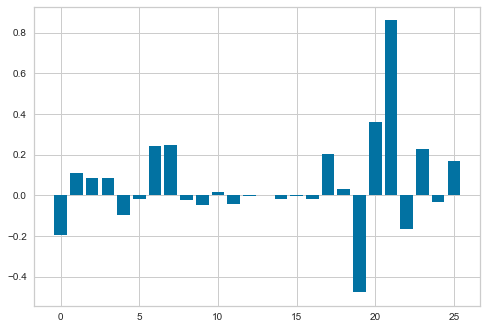

In [955]:
importance = pipeline.steps[1][1].coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Remarquez que les coefficients sont à la fois positifs et négatifs. Les **scores positifs** indiquent une caractéristique qui **prédit la classe 1**, tandis que les **scores négatifs** indiquent une caractéristique qui **prédit la classe 0.**

<Figure size 720x1440 with 0 Axes>

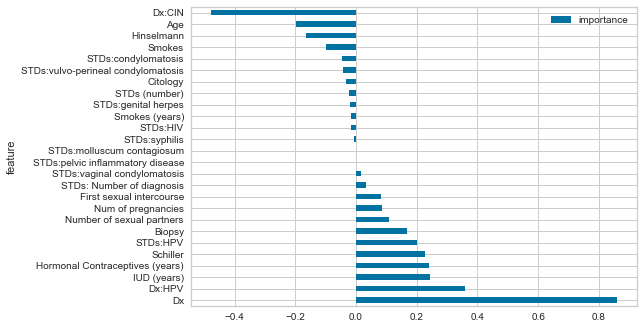

In [956]:
feature_importance = pd.DataFrame(x.columns, columns = ["feature"])
feature_importance["importance"] = importance#pow(math.e, importance)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
plt.figure(figsize=(10,20))
_ = feature_importance.plot.barh(x='feature', y='importance')
plt.show()

In [957]:
feature_importance_neg = feature_importance.loc[feature_importance.importance<0]
feature_importance_neg

,feature,importance
15,STDs:molluscum contagiosum,-0.001872
12,STDs:syphilis,-0.006257
16,STDs:HIV,-0.016733
5,Smokes (years),-0.017297
14,STDs:genital herpes,-0.020707
8,STDs (number),-0.022517
24,Citology,-0.033368
11,STDs:vulvo-perineal condylomatosis,-0.044157
9,STDs:condylomatosis,-0.046238
4,Smokes,-0.099714


In [958]:
print(f"Les colonnes qui participent le plus à la prédiction du target **0** par le model, cad être négative au cancer sont: {feature_importance_neg.feature}")

Les colonnes qui participent le plus à la prédiction du target **0** par le model, cad être négative au cancer sont: 15            STDs:molluscum contagiosum
12                         STDs:syphilis
16                              STDs:HIV
5                         Smokes (years)
14                   STDs:genital herpes
8                          STDs (number)
24                              Citology
11    STDs:vulvo-perineal condylomatosis
9                    STDs:condylomatosis
4                                 Smokes
22                            Hinselmann
0                                    Age
19                                Dx:CIN
Name: feature, dtype: object


In [959]:
feature_importance_pos = feature_importance.loc[feature_importance.importance>0]
print(f"Les colonnes qui participent le plus à la prédiction du target **1** par le model, cad être positive au cancer sont: {feature_importance_pos.feature}")

Les colonnes qui participent le plus à la prédiction du target **1** par le model, cad être positive au cancer sont: 21                                 Dx
20                             Dx:HPV
7                         IUD (years)
6     Hormonal Contraceptives (years)
23                           Schiller
17                           STDs:HPV
25                             Biopsy
1           Number of sexual partners
3                  Num of pregnancies
2            First sexual intercourse
18          STDs: Number of diagnosis
10        STDs:vaginal condylomatosis
Name: feature, dtype: object


<AxesSubplot:ylabel='feature'>

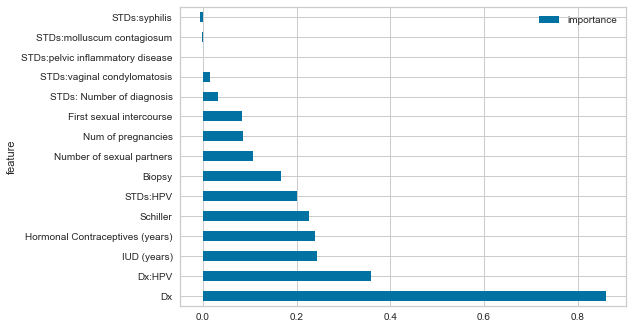

In [960]:
#les 11 caractéristiques les plus importantes
feature_importance.nlargest(15,"importance").plot.barh(x='feature', y='importance')

In [961]:
#réentrainons notre modèle avec les caractéristiques les plus importantes
x_train_if = x_train_p[list(feat_importance.nlargest(15,"importance").feature)]
x_test_if = x_test_p[list(feat_importance.nlargest(15,"importance").feature)]

In [962]:
pipeline_if = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2',solver='liblinear', max_iter=10000))
pipeline_if = pipeline_if.fit(x_train_if,y_train_p)
print(pipeline_if.score(x_train_if,y_train_p))

0.995


<Figure size 720x1440 with 0 Axes>

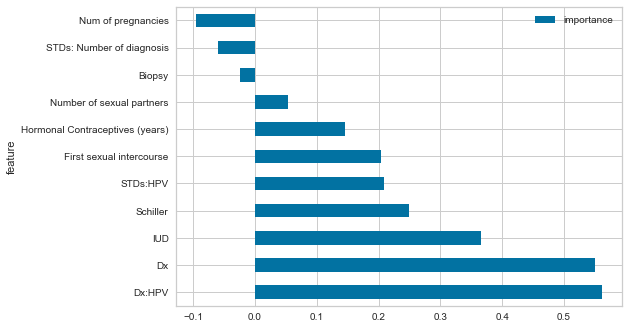

In [963]:
feat_importance = pd.DataFrame(x_train_if.columns, columns = ["feature"])
feat_importance["importance"] =  pipeline_if.steps[1][1].coef_[0]#pow(math.e, pipeline.steps[1][1].coef_[0])
feat_importance = feat_importance.sort_values(by = ["importance"], ascending=False)
plt.figure(figsize=(10,20))
ax = feat_importance.plot.barh(x='feature', y='importance')
plt.show()

In [965]:
test = pipeline.predict([[30, 12, 18,
                         0, 0, 0,
                         4, 4, 0, 
                         0, 0,
                         0, 
                         0, 0, 
                         1, 0,
                         1, 0, 2, 
                         0, 1, 1, 0, 0, 0, 0]])

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [966]:
test

array([1])

In [970]:
print(list(x_train_if.columns))

['Dx:HPV', 'Dx', 'IUD', 'Schiller', 'STDs:HPV', 'First sexual intercourse', 'Hormonal Contraceptives (years)', 'Number of sexual partners', 'Biopsy', 'STDs: Number of diagnosis', 'Num of pregnancies']


In [974]:
x_train.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:HPV',
       'STDs: Number of diagnosis', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann',
       'Schiller', 'Citology', 'Biopsy'],
      dtype='object')

In [975]:
def cervixModel(elements):
    x = pipeline.predict([elements])
    features = pipeline.steps[1][1].coef_[0]
    feature_importance = pd.DataFrame(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)',
       'STDs:condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:HIV', 'STDs:HPV',
       'STDs: Number of diagnosis', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann',
       'Schiller', 'Citology', 'Biopsy'], columns = ["feature"])
    feature_importance["importance"] = features#pow(math.e, importance)
    feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
    response = {'prediction':x,'features_important':feature_importance}
    return response

In [976]:
cervixModel([30, 12, 18,
                         0, 0, 0,
                         4, 4, 0, 
                         0, 0,
                         0, 
                         0, 0, 
                         1, 0,
                         1, 0, 2, 
                         0, 1, 1, 0, 0, 0, 0])

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'prediction': array([1]),
 'features_important':                                feature  importance
 21                                  Dx    0.859830
 20                              Dx:HPV    0.359782
 7                          IUD (years)    0.244732
 6      Hormonal Contraceptives (years)    0.239795
 23                            Schiller    0.226466
 17                            STDs:HPV    0.201971
 25                              Biopsy    0.166638
 1            Number of sexual partners    0.107349
 3                   Num of pregnancies    0.086274
 2             First sexual intercourse    0.083562
 18           STDs: Number of diagnosis    0.031940
 10         STDs:vaginal condylomatosis    0.015958
 13    STDs:pelvic inflammatory disease    0.000000
 15          STDs:molluscum contagiosum   -0.001872
 12                       STDs:syphilis   -0.006257
 16                            STDs:HIV   -0.016733
 5                       Smokes (years)   -0.017297
 14            

In [977]:
import joblib

In [978]:
joblib.dump(cervixModel,'cervixmodel.joblib')

['cervixmodel.joblib']

In [979]:
testModel = joblib.load('cervixmodel.joblib')

In [981]:
testModel([30, 12, 18,
                         0, 0, 0,
                         4, 4, 0, 
                         0, 0,
                         0, 
                         0, 0, 
                         1, 0,
                         1, 0, 2, 
                         0, 1, 1, 0, 0, 0, 0])

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'prediction': array([1]),
 'features_important':                                feature  importance
 21                                  Dx    0.859830
 20                              Dx:HPV    0.359782
 7                          IUD (years)    0.244732
 6      Hormonal Contraceptives (years)    0.239795
 23                            Schiller    0.226466
 17                            STDs:HPV    0.201971
 25                              Biopsy    0.166638
 1            Number of sexual partners    0.107349
 3                   Num of pregnancies    0.086274
 2             First sexual intercourse    0.083562
 18           STDs: Number of diagnosis    0.031940
 10         STDs:vaginal condylomatosis    0.015958
 13    STDs:pelvic inflammatory disease    0.000000
 15          STDs:molluscum contagiosum   -0.001872
 12                       STDs:syphilis   -0.006257
 16                            STDs:HIV   -0.016733
 5                       Smokes (years)   -0.017297
 14            